- Stocks & Trading
- Time Series Data
- Setting Up The Workspace
- Importing Financial Data Into Python
- Working With Time Series Data
- Outliers detection using Mahalanobis Distance
- Visualizing Time Series Data
- Returns
- Moving Windows
- Volatility Calculation
- Ordinary Least-Squares Regression (OLS)
- Implementation Of A Simple Backtester
- Backtesting With Zipline And Quantopian
- Sharpe Ratio
- Maximum Drawdown
- Compound Annual Growth Rate

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

import statsmodels.api as sm
from pandas import tseries

In [2]:
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

start, end = datetime.datetime(2006, 10, 1), datetime.datetime(2023, 5, 6)
aapl = pdr.get_data_yahoo('AAPL', start=start, end=end)
aapl

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-10-02,2.682143,2.709643,2.653571,2.673571,2.275526,712639200
2006-10-03,2.658929,2.676786,2.613929,2.645714,2.251816,790708800
2006-10-04,2.646429,2.695000,2.612857,2.692143,2.291333,829082800
2006-10-05,2.661786,2.720000,2.647500,2.672500,2.274613,683883200
2006-10-06,2.657857,2.680000,2.636071,2.650714,2.256072,466958800
...,...,...,...,...,...,...
2023-05-01,169.279999,170.449997,168.639999,169.589996,169.589996,52472900
2023-05-02,170.089996,170.350006,167.539993,168.539993,168.539993,48425700
2023-05-03,169.500000,170.919998,167.160004,167.449997,167.449997,65136000


In [3]:
# import quandl 
# aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")
# aapl.head()

### Working With Time Series Data

In [4]:
# Add a column `diff` to `aapl` 
aapl['diff'] = aapl.Close - aapl.Open

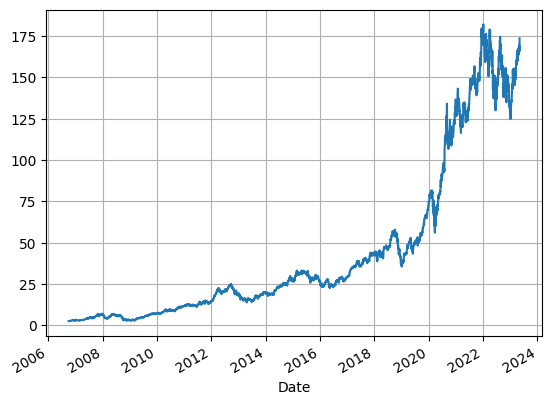

In [5]:
# Plot the closing prices for `aapl`
aapl['Close'].plot(grid=True)
# Show the plot
plt.show()

<a id='commonanalyses'></a>
## Common Financial Analysis

### Returns

In [6]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj Close
Date                 
2006-10-02   0.000000
2006-10-03  -0.010419
2006-10-04   0.017549
2006-10-05  -0.007297
2006-10-06  -0.008152
...               ...
2023-05-01  -0.000530
2023-05-02  -0.006191
2023-05-03  -0.006467
2023-05-04  -0.009913
2023-05-05   0.046927

[4177 rows x 1 columns]
            Adj Close
Date                 
2006-10-02        NaN
2006-10-03  -0.010474
2006-10-04   0.017397
2006-10-05  -0.007324
2006-10-06  -0.008185
...               ...
2023-05-01  -0.000531
2023-05-02  -0.006211
2023-05-03  -0.006488
2023-05-04  -0.009963
2023-05-05   0.045859

[4177 rows x 1 columns]


In [7]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,Open,High,Low,Close,Adj Close,Volume,diff
Date,,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.125777,0.126451,0.121460,0.122860,0.122860,0.369611,-2.007580
2007-06-30,0.196029,0.195413,0.198331,0.197735,0.197735,-0.080296,-1.193769
2007-10-31,0.400961,0.404613,0.392010,0.400796,0.400796,0.306882,-0.429622
2008-02-29,0.127066,0.130711,0.117746,0.120394,0.120394,0.172293,-82.429605
2008-06-30,-0.003550,-0.004290,0.005927,0.003673,0.003673,-0.209762,-1.233311
2008-10-31,-0.114267,-0.108879,-0.124618,-0.118803,-0.118803,0.133219,-3.436440
2009-02-28,-0.363639,-0.363388,-0.359305,-0.360865,-0.360865,-0.161601,-1.098423
2009-06-30,0.312134,0.304359,0.324702,0.316588,0.316588,-0.386935,7.972125


In [8]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1
# Print `daily_pct_c`
print(daily_pct_c)

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03  -0.010419
2006-10-04   0.017549
2006-10-05  -0.007297
2006-10-06  -0.008152
...               ...
2023-05-01  -0.000530
2023-05-02  -0.006191
2023-05-03  -0.006467
2023-05-04  -0.009913
2023-05-05   0.046927

[4177 rows x 1 columns]


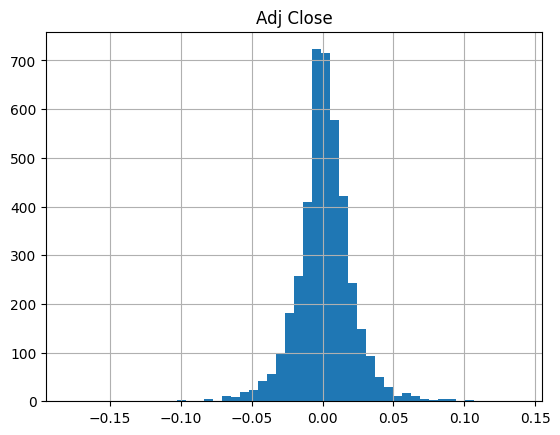

         Adj Close
count  4176.000000
mean      0.001244
std       0.020242
min      -0.179195
25%      -0.008220
50%       0.001006
75%       0.011725
max       0.139049


In [9]:
# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)
# Show the plot
plt.show()
# Pull up summary statistics
print(daily_pct_c.describe())

In [10]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()
# Print `cum_daily_return`
print(cum_daily_return)

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03   0.989581
2006-10-04   1.006947
2006-10-05   0.999599
2006-10-06   0.991451
...               ...
2023-05-01  74.527836
2023-05-02  74.066403
2023-05-03  73.587394
2023-05-04  72.857891
2023-05-05  76.276887

[4177 rows x 1 columns]


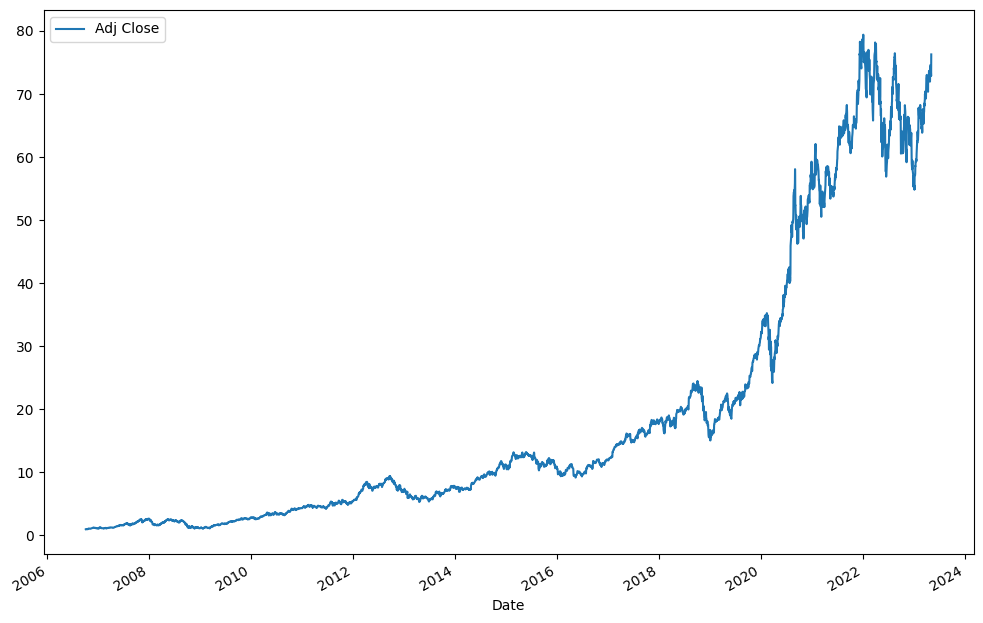

In [11]:
# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))
# Show the plot
plt.show()

In [12]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()
# Print the `cum_monthly_return`
print(cum_monthly_return)

            Adj Close
Date                 
2006-10-31   1.031710
2006-11-30   1.140058
2006-12-31   1.155110
2007-01-31   1.187303
2007-02-28   1.145176
...               ...
2023-01-31  59.578326
2023-02-28  66.307045
2023-03-31  68.100655
2023-04-30  72.530844
2023-05-31  74.263282

[200 rows x 1 columns]


In [13]:
from pandas_datareader import data as pdr

def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, start, end)
all_data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open      High       Low     Close  Adj Close  \
Ticker Date                                                            
AAPL   2006-10-02  2.682143  2.709643  2.653571  2.673571   2.275526   
       2006-10-03  2.658929  2.676786  2.613929  2.645714   2.251816   
       2006-10-04  2.646429  2.695000  2.612857  2.692143   2.291333   
       2006-10-05  2.661786  2.720000  2.647500  2.672500   2.274613   
       2006-10-06  2.657857  2.680000  2.636071  2.650714   2.256072   

                      Volume  
Ticker Date                   
AAPL   2006-10-02  712639200  
       2006-10-03  790708800  
       2006-10-04  829082800  
       2006-10-05  683883200  
       2006-10-06  466958800

In [14]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

daily_close_px

<ipython-input-14-14ce10c248b2>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')


Ticker,AAPL,GOOG,IBM,MSFT
Date,,,,
2006-10-02,2.275526,9.998523,47.026833,19.699507
2006-10-03,2.251816,10.063280,46.900467,19.706713
2006-10-04,2.291333,10.353692,47.733349,20.117123
2006-10-05,2.274613,10.256805,47.629955,20.102716
2006-10-06,2.256072,10.473244,47.756348,20.066721
...,...,...,...,...
2023-05-01,169.589996,107.709999,126.089996,305.559998
2023-05-02,168.539993,105.980003,125.160004,305.410004
2023-05-03,167.449997,106.120003,123.449997,304.399994


In [76]:
covariance_wxyz = np.cov(daily_close_px) # calculate the covariance matrix
inv_covariance_wxyz = np.linalg.inv(covariance_wxyz) #take the inverse of the covariance matrix
wxyz_mean = np.mean(daily_close_px[daily_close_px.columns[0]]),np.mean(daily_close_px[daily_close_px.columns[1]]),np.mean(daily_close_px[daily_close_px.columns[2]]),np.mean(daily_close_px[daily_close_px.columns[3]])
w_diff = np.array([w_i - wxyz_mean[0] for w_i in daily_close_px[daily_close_px.columns[0]]]) # take the diffrence between the mean of W variable the sample
x_diff = np.array([x_i - wxyz_mean[1] for x_i in daily_close_px[daily_close_px.columns[1]]]) # take the diffrence between the mean of X variable the sample
y_diff = np.array([y_i - wxyz_mean[2] for y_i in daily_close_px[daily_close_px.columns[2]]]) # take the diffrence between the mean of Y variable the sample
z_diff = np.array([z_i - wxyz_mean[3] for z_i in daily_close_px[daily_close_px.columns[3]]]) # take the diffrence between the mean of Z variable the sample
diff_wxyz = np.transpose([w_diff,x_diff,y_diff,z_diff])

MD = []
temp = np.transpose(np.dot(np.transpose(diff_wxyz),inv_covariance_wxyz))
for i in range(len(diff_wxyz)):
  MD.append(np.sqrt(abs(np.dot(temp[i],diff_wxyz[i])))) #calculate the Mahalanobis Distance for each data sample

threshold = np.mean(MD) * 1.5 # adjust 1.5 accordingly
outliers = []
for i in range(len(MD)):
    if MD[i] > threshold:
        outliers.append(i) # index of the outlier

len(outliers)

869

In [84]:
temp_data = daily_close_px
for i in range(len(daily_close_px)):
  temp_data.drop(daily_close_px.index[i])
daily_close_px = temp_data

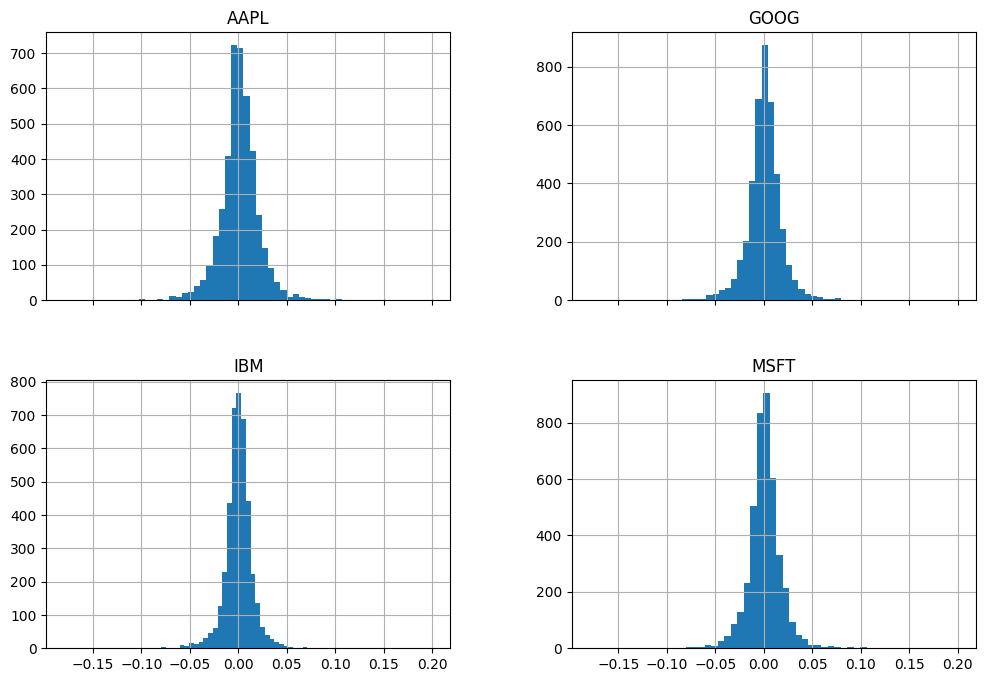

In [85]:
# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()
# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))
# Show the resulting plot
plt.show()

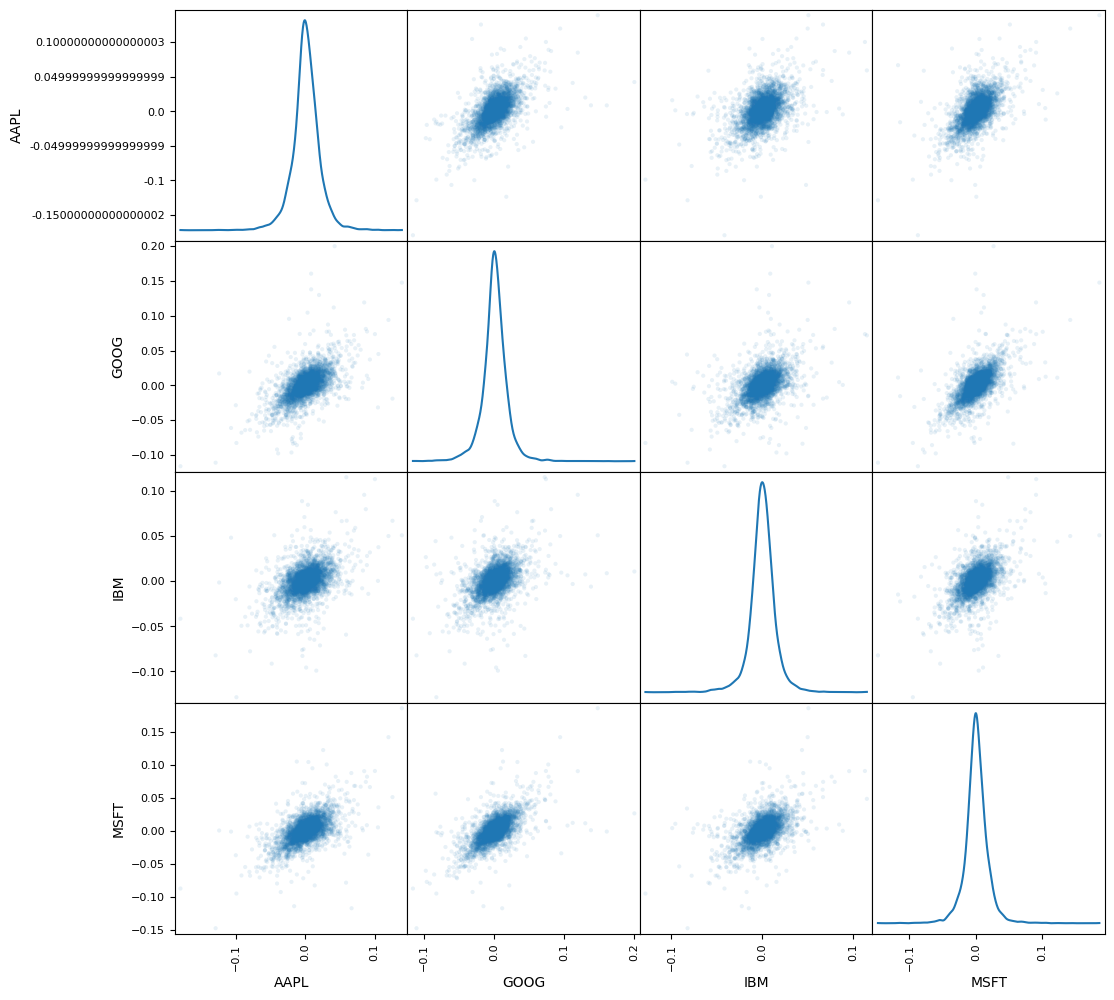

In [86]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))
# Show the plot
plt.show()

### Moving Windows

In [87]:
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj Close']
# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()
# Inspect the result
moving_avg[-10:]

Date
2023-04-24    158.244250
2023-04-25    158.640500
2023-04-26    159.049250
2023-04-27    159.626750
2023-04-28    160.221000
2023-05-01    160.685000
2023-05-02    161.052750
2023-05-03    161.448999
2023-05-04    161.771999
2023-05-05    162.346500
Name: Adj Close, dtype: float64

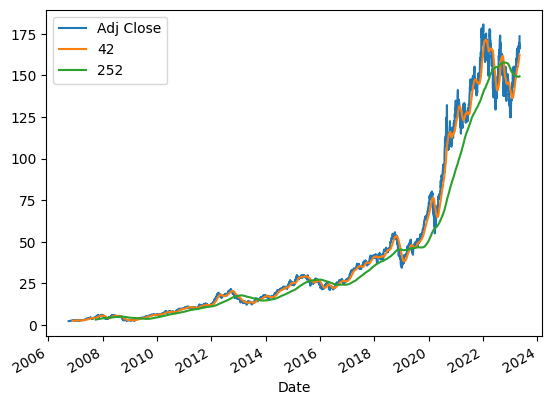

In [88]:
# Short moving window rolling mean
aapl['42'] = adj_close_px.rolling(window=40).mean()
# Long moving window rolling mean
aapl['252'] = adj_close_px.rolling(window=252).mean()
# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj Close', '42', '252']].plot()
plt.show()

### Volatility Calculation

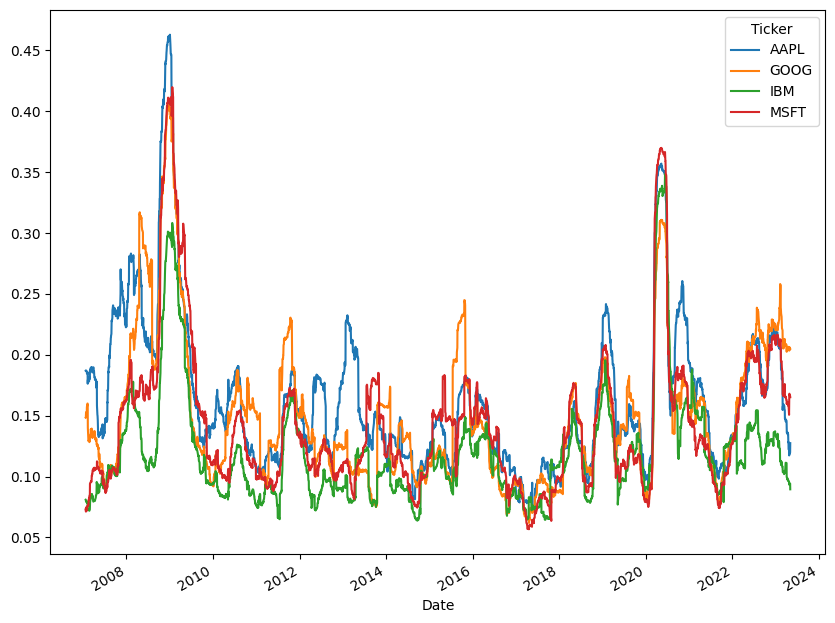

In [89]:
# Define the minumum of periods to consider 
min_periods = 75 
# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 
# Plot the volatility
vol.plot(figsize=(10, 8))
# Show the plot
plt.show()

### Ordinary Least-Squares Regression (OLS)

In [110]:
# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]
# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')
# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')
# Isolate the IBM returns
ibm_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'IBM']
ibm_returns.index = ibm_returns.index.droplevel('Ticker')
# Isolate the MSFT returns
goog_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'GOOG']
goog_returns.index = goog_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns,ibm_returns,goog_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT', 'IBM', 'GOOG']
return_data = return_data[(return_data<0.10)&(return_data>-0.10)].dropna()

# Add a constant 
X = sm.add_constant(return_data['AAPL'])
# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()
# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     1886.
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        22:38:28   Log-Likelihood:                 11873.
No. Observations:                4150   AIC:                        -2.374e+04
Df Residuals:                    4148   BIC:                        -2.373e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.619      0.5

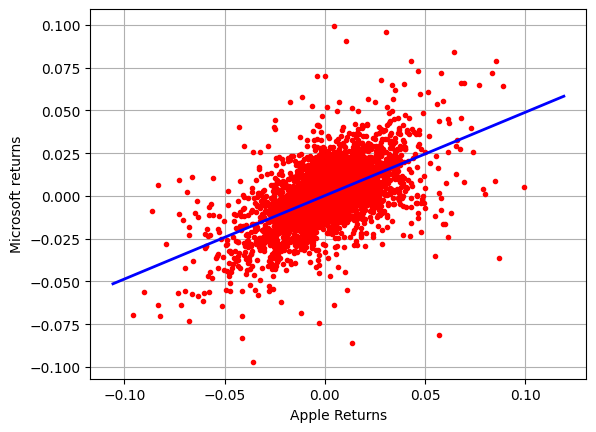

In [112]:
plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)

plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

plt.show()

In [113]:
return_data.corr()

,AAPL,MSFT,IBM,GOOG
AAPL,1.000000,0.559093,0.443341,0.581869
MSFT,0.559093,1.000000,0.499282,0.632009
IBM,0.443341,0.499282,1.000000,0.450652
GOOG,0.581869,0.632009,0.450652,1.000000


In [114]:
np.linalg.det(np.cov(return_data))

0.0

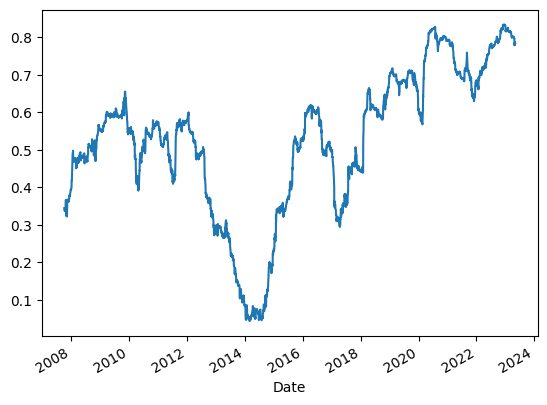

In [115]:
return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot()
plt.show()

<a id='tradingstrategy'></a>
## Building A Trading Strategy With Python

In [116]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

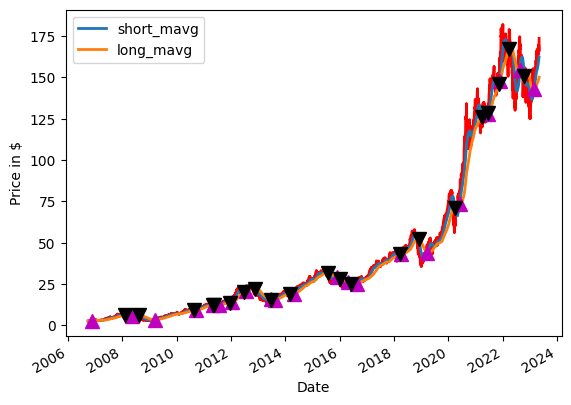

In [117]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.short_mavg[signals.positions == 1.0], '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.short_mavg[signals.positions == -1.0], 'v', markersize=10, color='k')
         
# Show the plot
plt.show()

<a id='backtesting'></a>
## Backtesting A Strategy

### Implementation Of A Simple Backtester With Pandas

In [118]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

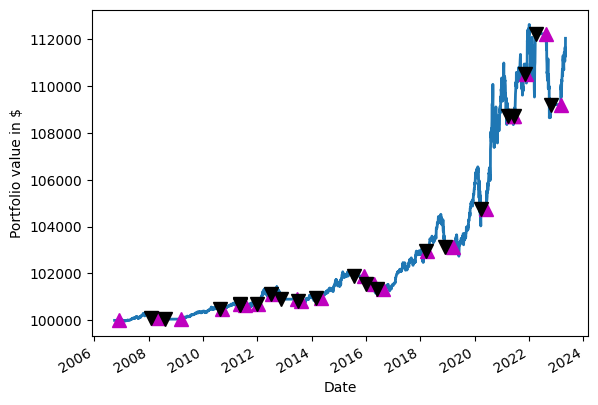

In [119]:
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, portfolio.total[signals.positions == 1.0], '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, portfolio.total[signals.positions == -1.0], 'v', markersize=10, color='k')

# Show the plot
plt.show()

<a id='evaluating'></a>
## Evaluating Moving Average Crossover Strategy 

### Sharpe Ratio

In [120]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.4696594440229649


### Maximum Drawdown

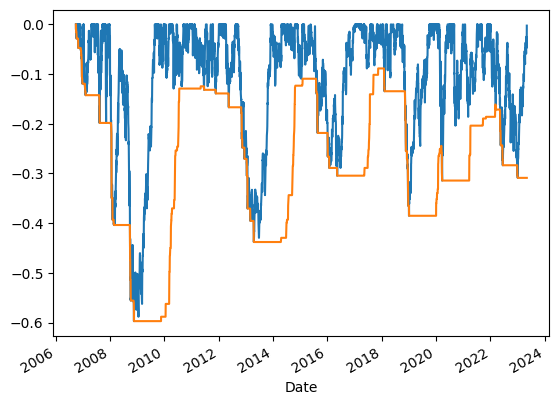

In [121]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = aapl['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

### Compound Annual Growth Rate (CAGR)

In [122]:
# Get the number of days in `aapl`
days = (aapl.index[-1] - aapl.index[0]).days

# Calculate the CAGR 
cagr = ((((aapl['Adj Close'][-1]) / aapl['Adj Close'][1])) ** (365.0/days)) - 1

# Print CAGR
print(cagr)

0.2991855789868476
